In [1]:
#import calendar
from datetime import datetime, timedelta
#import time  
import pandas as pd
import QuantLib as ql
#import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
b11 = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input_seperate\\mean_b11.csv')
b21 = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input_seperate\\mean_b21.csv')

b11.head()

,date,skew,vol,vol_2
0,1996-02-05,0.044730,0.220429,0.316522
1,1996-03-04,0.030961,0.311313,0.567502
2,1996-04-08,0.037552,0.268198,0.442574
3,1996-05-06,0.035517,0.257000,0.391721
4,1996-06-10,0.019195,0.289212,0.457521


In [4]:
#b11['date'] = pd.to_datetime([date for date in b11['date']])
#b21['date'] = pd.to_datetime([date for date in b21['date']])
b11_d = pd.to_datetime([date for date in b11['date']])
b21_d = pd.to_datetime([date for date in b21['date']])

In [5]:
mar_cap = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input_seperate\\semi_index.csv')
mar_cap['date'] = pd.to_datetime([date for date in mar_cap['date']])
mar_cap['date'] = [str(datetime.date(i)) for i in mar_cap['date']]
mar_cap

,date,semi index
0,1996-01-02,1.000000
1,1996-01-03,0.968067
2,1996-01-04,0.967984
3,1996-01-05,0.964280
4,1996-01-08,0.958427
...,...,...
5595,2018-03-23,7.521252
5596,2018-03-26,7.856576
5597,2018-03-27,7.568355
5598,2018-03-28,7.398559


# 發布訊號後的4、8、12週日期

In [8]:
def is_holiday(date):
    # 確認前一日是否仍為假日，若為假日則再前一天
    df = pd.read_excel('D:\\碩論資料\\耶穌受難日.xlsx')['good Friday'].to_list()
    good_fri = [str(datetime.date(i)) for i in df]
    while(us_calendar.isHoliday(ql.Date(date.day, date.month, date.year)) or str(datetime.date(date)) in good_fri):
        date = date - timedelta(days = 1)
    return date


us_calendar = ql.UnitedStates()
week_return = [4, 8, 12]

# 發布訊號後4,8,12週的日期
b21_re_date = []
b11_re_date = []
for i in range(len(b21_d)):
    b21_re_date.append([is_holiday(b21_d[i] + timedelta(days=7*w)) for w in week_return])
    b11_re_date.append([is_holiday(b11_d[i] + timedelta(days=7*w)) for w in week_return])

b21_re_date = pd.DataFrame(b21_re_date, columns = ['return 4w', 'return 8w', 'return 12w'])
b11_re_date = pd.DataFrame(b11_re_date, columns = ['return 4w', 'return 8w', 'return 12w'])


In [ ]:
lost = []  # 無股票資料
close = []  # 休市
for col in b11_re_date.columns:
    for d in b11_re_date[col]:
        if str(datetime.date(d)) not in mar_cap['date'].to_list():
            lost.append(d)
        if us_calendar.isHoliday(ql.Date(d.day, d.month, d.year)):
            close.append(d)
        

lost = set(lost)
close = set(close)
print('非假日但無交易資料\n', pd.DataFrame(set(lost-close)))
print()
print('假日但有交易資料\n', pd.DataFrame(set(close-lost)))
#pd.DataFrame(close)
#pd.DataFrame(lost)

In [11]:
b11_re_date.head()

,return 4w,return 8w,return 12w
0,1996-03-04,1996-04-01,1996-04-29
1,1996-04-01,1996-04-29,1996-05-24
2,1996-05-06,1996-06-03,1996-07-01
3,1996-06-03,1996-07-01,1996-07-29
4,1996-07-08,1996-08-05,1996-08-30


# 計算報酬率

In [ ]:
b11_re = []
b21_re = []

for i in range(len(b11_re_date)):
    dates = [str(datetime.date(i)) for i in b11_re_date.iloc[i]]

    sig_d = float(mar_cap[mar_cap['date'] == b11['date'][i]]['semi index'])
    re_d = [float(mar_cap[mar_cap['date'] == D]['semi index']) for D in dates]
    b11_re.append([(i-sig_d)/sig_d for i in re_d])

b11_re = pd.DataFrame(b11_re, columns = ['return 4w', 'return 8w', 'return 12w'])
b11_re['date'] = b11_d
#b11_re.to_csv('C:\\Users\\User\\Desktop\\資料整理\\input_seperate\\' + 'b11_return.csv', index=False)


for i in range(len(b21_re_date)):
    dates = [str(datetime.date(i)) for i in b21_re_date.iloc[i]]

    sig_d = float(mar_cap[mar_cap['date'] == b21['date'][i]]['semi index'])
    re_d = [float(mar_cap[mar_cap['date'] == D]['semi index']) for D in dates]
    b21_re.append([(i-sig_d)/sig_d for i in re_d])

b21_re = pd.DataFrame(b21_re, columns = ['return 4w', 'return 8w', 'return 12w'])
b21_re['date'] = b21_d
#b21_re.to_csv('C:\\Users\\User\\Desktop\\資料整理\\input_seperate\\' + 'b21_return.csv', index=False)

## *資料合併*

In [12]:
#r_11 = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input_seperate\\b11_return.csv')
#all_11 = pd.merge(b11, r_11)
#all_11.to_csv('C:\\Users\\User\\Desktop\\資料整理\\input\\' + 'b11_all.csv', index=False)
all_11 = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input\\b11_all.csv')
all_11

,date,skew,vol,vol_2,return 4w,return 8w,return 12w
0,1996-02-05,0.044730,0.220429,0.316522,-0.119685,-0.107513,0.038030
1,1996-03-04,0.030961,0.311313,0.567502,0.013826,0.179156,0.173963
2,1996-04-08,0.037552,0.268198,0.442574,0.124304,0.153490,0.097721
3,1996-05-06,0.035517,0.257000,0.391721,0.025959,-0.023643,-0.139836
4,1996-06-10,0.019195,0.289212,0.457521,-0.037492,-0.073386,-0.062085
...,...,...,...,...,...,...,...
258,2017-08-07,0.032408,0.304394,0.520162,0.006692,0.063599,0.156402
259,2017-09-01,0.030325,0.267063,0.423728,0.049422,0.145336,0.216468
260,2017-10-06,0.028901,0.248124,0.413673,0.108643,0.078524,0.078594
261,2017-11-06,0.027199,0.284228,0.470235,-0.059079,-0.036787,0.049378


In [13]:
#r_21 = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input\\b21_return.csv')
#all_21 = pd.merge(b21, r_21)
#all_21.to_csv('C:\\Users\\User\\Desktop\\資料整理\\input\\' + 'b21_all.csv', index=False)
all_21 = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input\\b21_all.csv')
all_21

,date,skew,vol,vol_2,return 4w,return 8w,return 12w
0,1996-01-26,0.077824,0.271552,0.403947,0.109877,-0.008098,0.076051
1,1996-02-23,0.060367,0.285074,0.427599,-0.106296,-0.030477,0.053697
2,1996-03-29,0.041653,0.269182,0.434870,0.180911,0.155227,0.110994
3,1996-04-26,0.063188,0.225595,0.323356,-0.021749,-0.059206,-0.145640
4,1996-05-31,0.043021,0.297846,0.475690,-0.079455,-0.145753,-0.083725
...,...,...,...,...,...,...,...
258,2017-07-28,0.036907,0.312208,0.682074,-0.014670,0.043691,0.121435
259,2017-08-25,0.031063,0.305098,0.682160,0.059230,0.138131,0.223982
260,2017-09-29,0.034389,0.263637,0.416696,0.091396,0.159179,0.114192
261,2017-10-27,0.032616,0.326988,0.572131,0.062106,0.020887,0.079629


In [19]:
import datetime as dt

dt.date(1996, 2, 5) - dt.date(1996, 4, 29)

datetime.timedelta(days=-84)

# 圖型

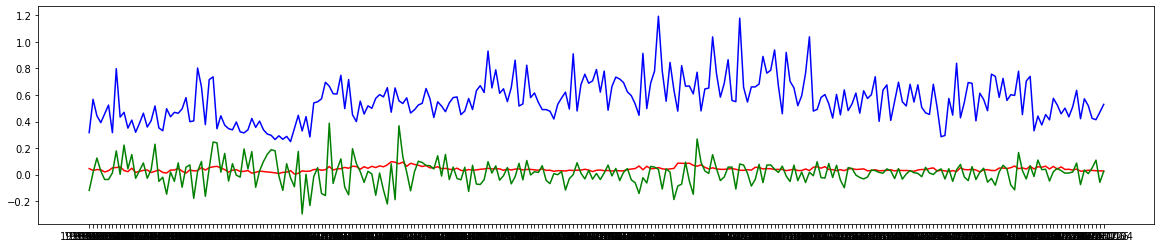

In [22]:
plt.figure(figsize=(20,4))
plt.plot(all_11['date'], all_11['skew'], color='r')
plt.plot(all_11['date'], all_11['vol_2'], color='b')
plt.plot(all_11['date'], all_11['return 4w'], color='g')

#plt.title('') # title
#plt.ylabel('') # y label
#plt.xlabel('') # x label
#plt.plot(b11['date'], b11['vol'], color='b', label='vol_11')
plt.show()

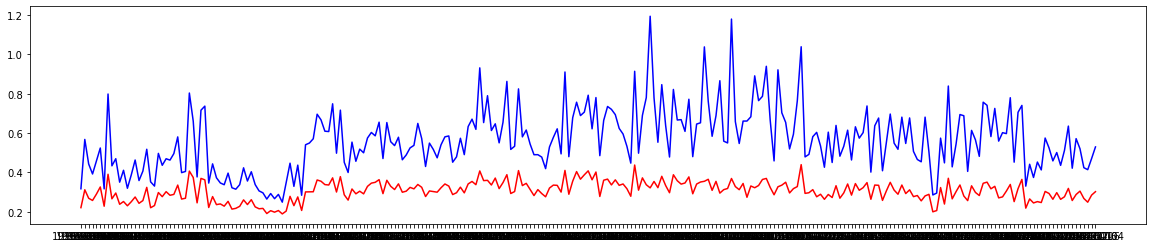

In [23]:
plt.figure(figsize=(20,4))
plt.plot(all_11['date'], all_11['vol'], color='r')
plt.plot(all_11['date'], all_11['vol_2'], color='b')
plt.show()

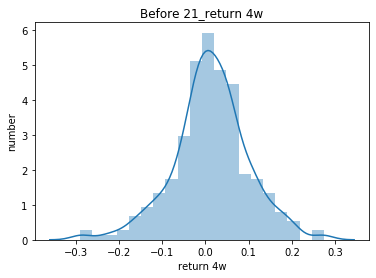

count    263.000000
mean       0.012581
std        0.087136
min       -0.289567
25%       -0.030934
50%        0.013706
75%        0.059471
max        0.274142
Name: return 4w, dtype: float64


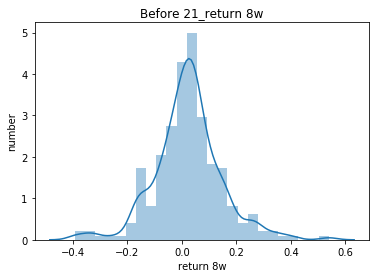

count    263.000000
mean       0.022482
std        0.124751
min       -0.392609
25%       -0.040571
50%        0.023508
75%        0.079192
max        0.539698
Name: return 8w, dtype: float64


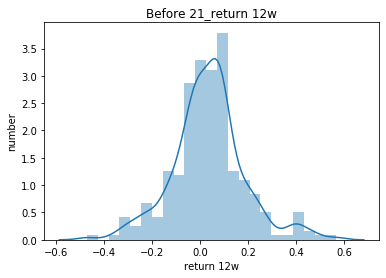

count    263.000000
mean       0.035579
std        0.151803
min       -0.470834
25%       -0.045533
50%        0.039654
75%        0.102467
max        0.567745
Name: return 12w, dtype: float64


In [63]:
for col in all_21.columns[-3:]:
    plt.title('Before 21_' + col)
    plt.ylabel('number')
    plt.xlabel('return')
    sns.distplot(all_21[col])
    plt.show()
    print(all_21[col].describe())

# 標記空頭

In [42]:
sum(all_11['return 4w'] < 0)

108

In [74]:
b11_4w_min = [i for i in all_11['return 4w'] if (i < 0)]
b11_4w_min.sort()

In [77]:
mid = b11_4w_min[int(len(b11_4w_min)/2)]

In [81]:
len([i for i in b11_4w_min if (i < mid)])

54